In [ ]:
!pip install --force tqdm==4.24.0
!pip install --force tensorflow=1.15.0

In [ ]:
!git clone https://github.com/robertluxemburg/stylegan2encoder

In [1]:
%cd stylegan2encoder

[Errno 2] No such file or directory: 'stylegan2encoder'
/Users/leon/Files/stylegan2encoder


In [2]:
%ls

Dockerfile*                      ffhq_dataset/
LICENSE.txt*                     metrics/
README.md*                       pretrained_networks.py*
StyleGAN_Encoder_Tutorial.ipynb  projector.py*
Untitled.ipynb                   robust_loss/
adaptive.py                      run_generator.py*
align_images.py*                 run_metrics.py*
dataset_tool.py*                 run_projector.py*
dnnlib/                          run_training.py*
docs/                            swa.py
encode_images.py*                test_nvcc.cu*
encoder/                         training/


In [3]:
!mkdir aligned_images raw_images

In [4]:
import glob, os
import PIL.Image

In [18]:
%ls

Dockerfile*                      ffhq_dataset/
LICENSE.txt*                     metrics/
README.md*                       pretrained_networks.py*
StyleGAN_Encoder_Tutorial.ipynb  projector.py*
Untitled.ipynb                   raw_images/
adaptive.py                      robust_loss/
align_images.py*                 run_generator.py*
aligned_images/                  run_metrics.py*
dataset_tool.py*                 run_projector.py*
dnnlib/                          run_training.py*
docs/                            swa.py
encode_images.py*                test_nvcc.cu*
encoder/                         training/


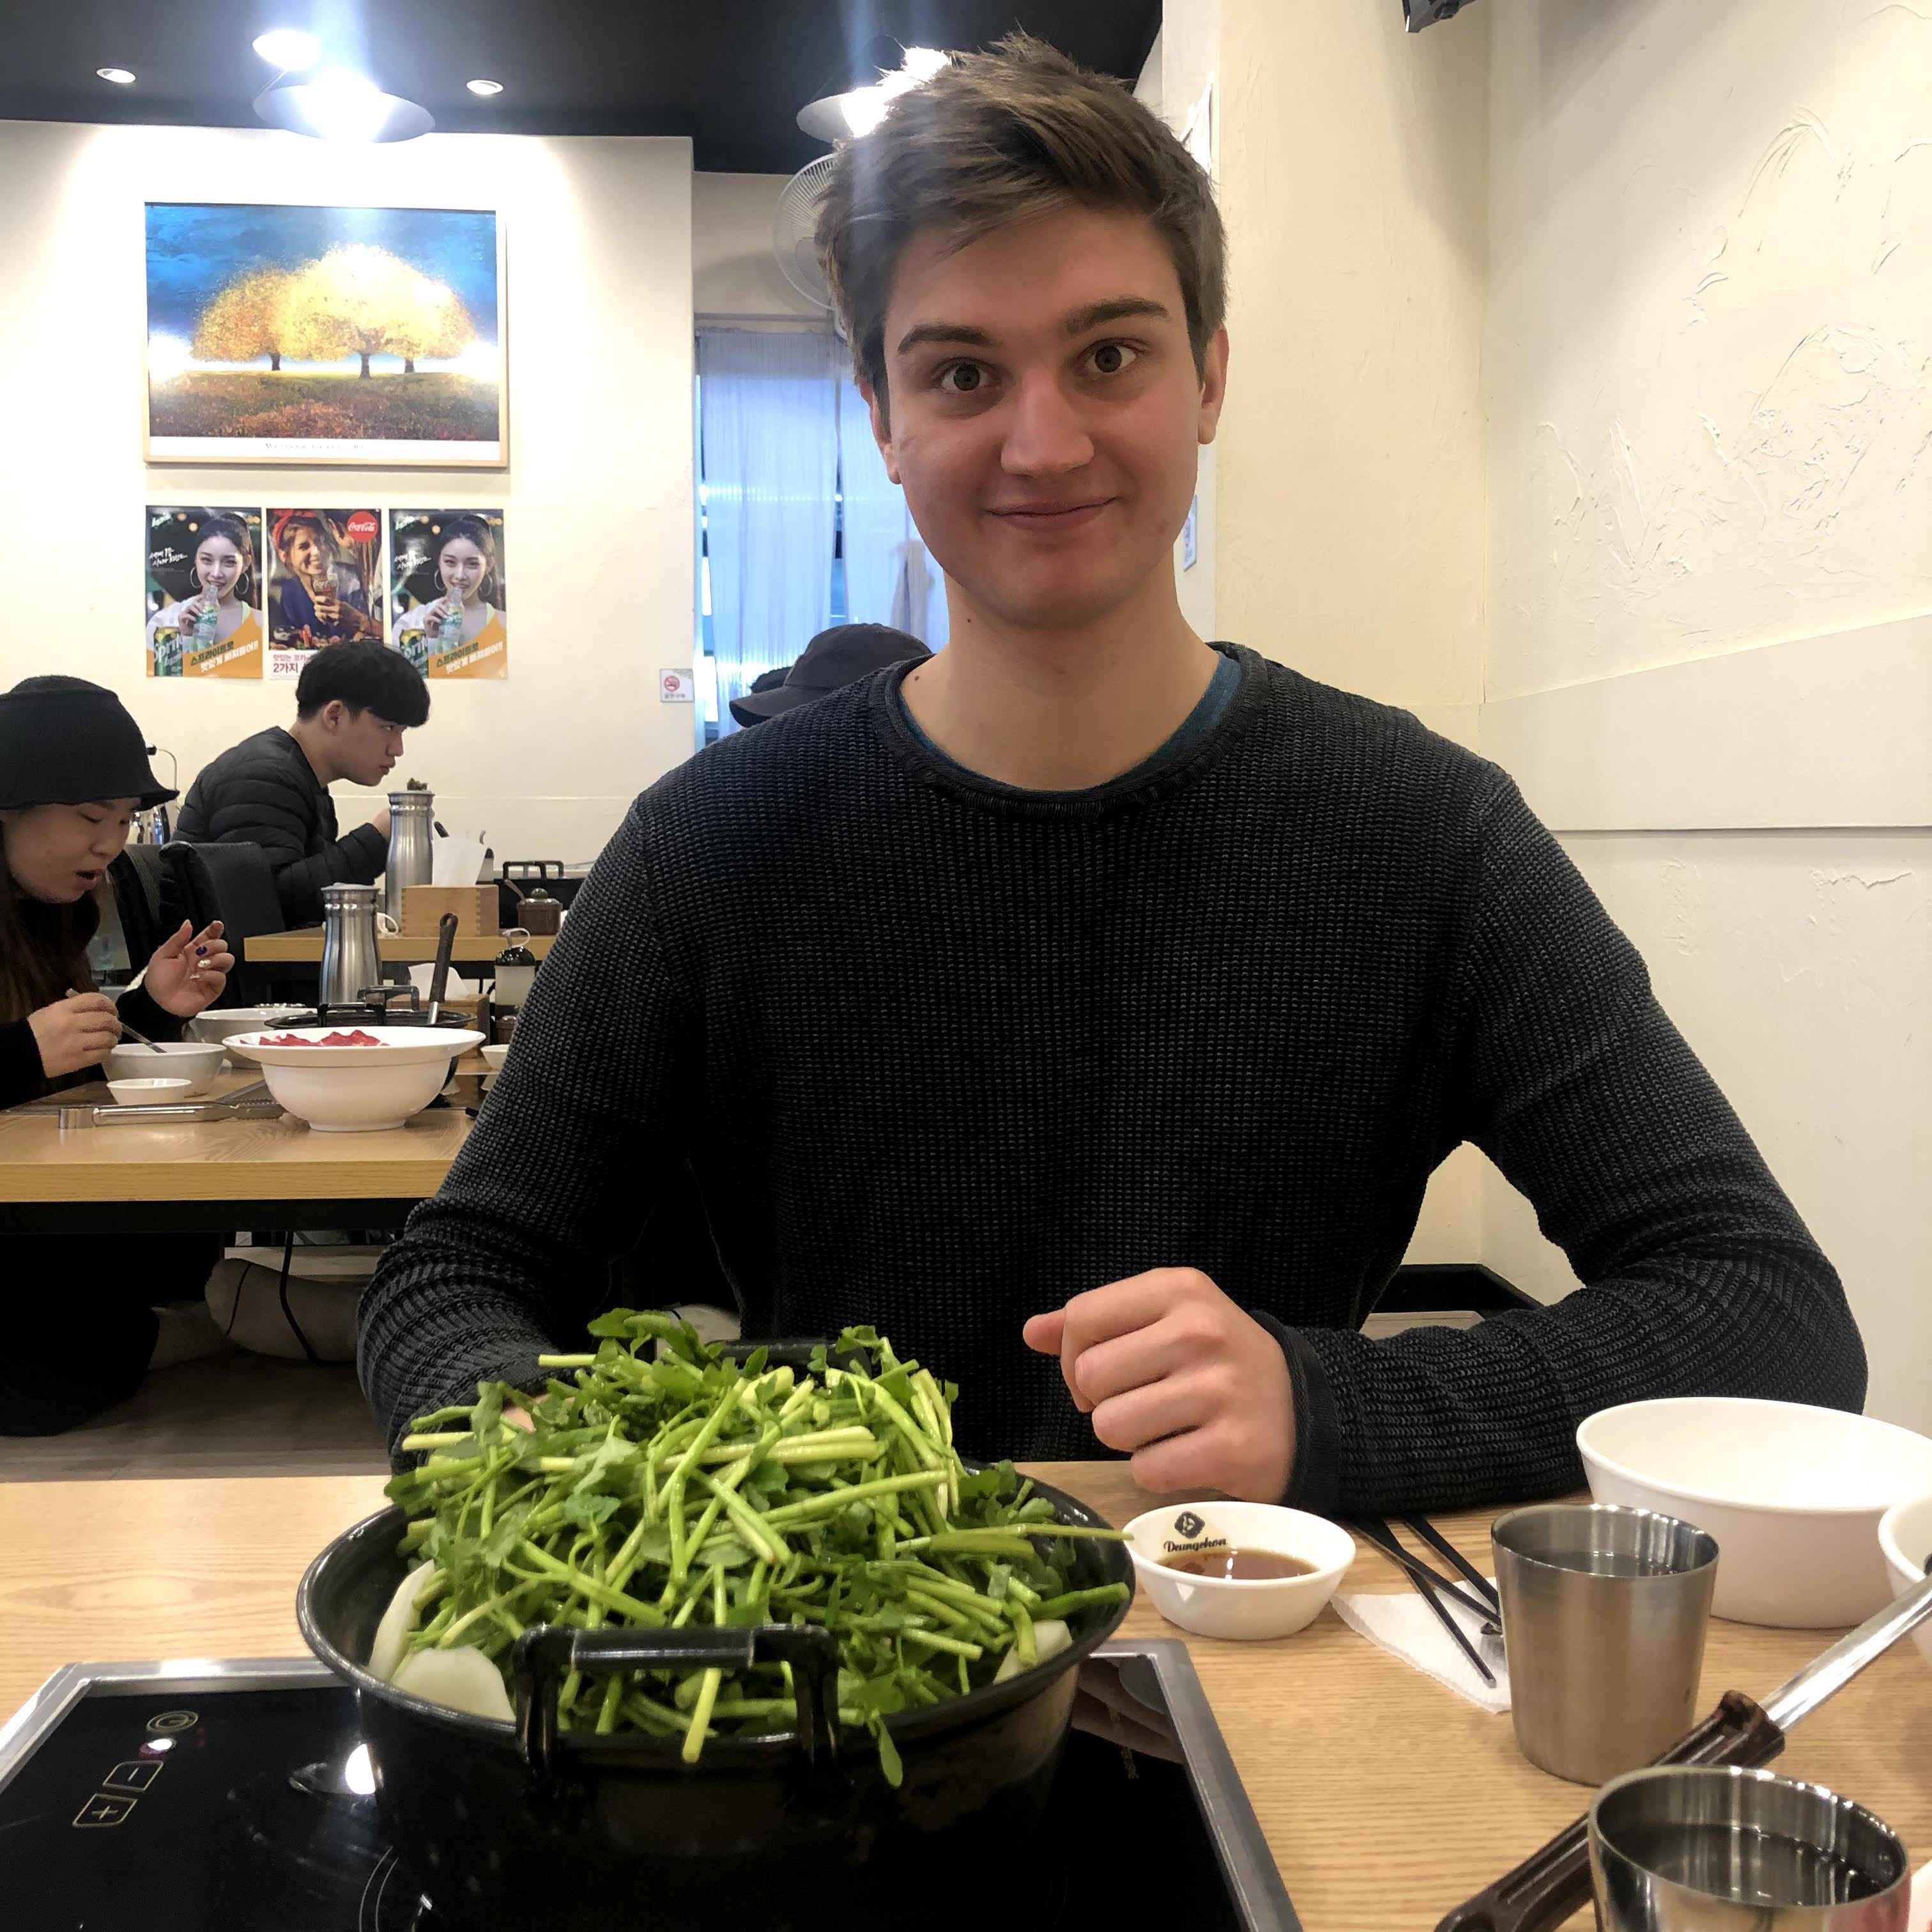

In [33]:
path = "raw_images/"
valid_images = (".jpg",".png")
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img)


In [34]:
!python align_images.py raw_images/ aligned_images/

Using TensorFlow backend.


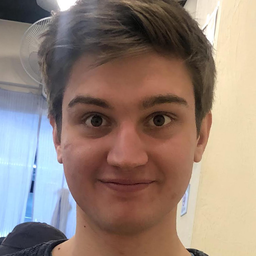

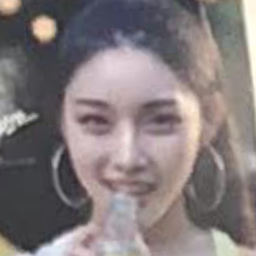

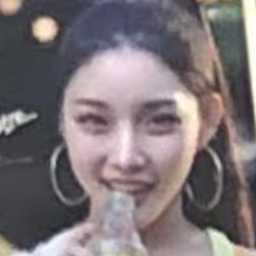

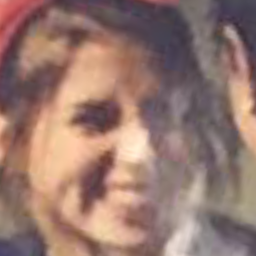

In [38]:
path = "aligned_images/"
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

In [ ]:
!python encode_images.py --help

In [ ]:
!python encode_images.py aligned_images/ generated_images/ latent_representations/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --lr=0.25 --iterations=1000 --use_l1_penalty=0.5

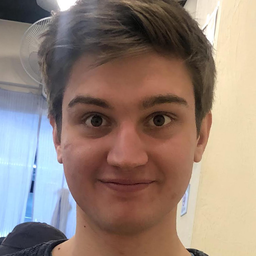

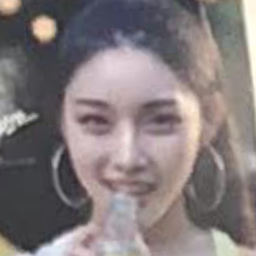

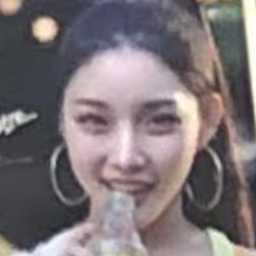

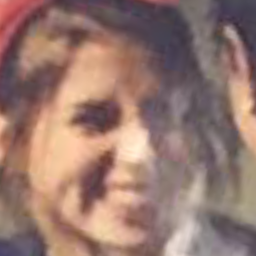

In [39]:
path = "generated_images/"
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

In [51]:
#!python fit_faces.py raw_images/IMG_8918.jpg generated_images/IMG_8918_01.png masks/IMG_8918_01.png aligned_images/IMG_8918_01.npy out/IMG_8918.png

!python fit_faces.py raw_images/IMG_8918.jpg aligned_images/IMG_8918_01.png masks/IMG_8918_01.png aligned_images/IMG_8918_01.npy out/IMG_8918.png

Done!
